In [ ]:
!pip install matplotlib

In [ ]:
from __future__ import annotations
from dataclasses import dataclass, field
import random
import matplotlib.pyplot as plt

In [ ]:
@dataclass
class MazeCell:
    x: int
    y: int
    rank: int
    walls: list[bool]
    is_open: bool
    component: MazeCell

    def __init__(self, x: int, y: int):
        self.x = x
        self.y = y
        self.rank = 0
        self.walls = [True, True, True, True] # up, right, down, left
        self.is_open = False
        self.component = self


@dataclass
class Node:
    data: any
    next: Node

In [ ]:
class Queue:
    def __init__(self):
        self.head = None
        self.tail = None

    def push(self, data):
        if self.head is None:
            self.tail = self.head = Node(data=data, next=None)
        else:
            self.tail.next = Node(data=data, next=None)
            self.tail = self.tail.next

    def pop(self):
        if self.head is None: return None
        data = self.head.data
        self.head = self.head.next
        if self.head is None: self.tail = None
        return data

In [ ]:
def find(cell):
    path = Queue()
    while cell.component != cell:
        path.push(cell)
        cell = cell.component
    c = path.pop()
    while c is not None:
        c.component = cell
        c = path.pop()

def union(x, y):
    find(x)
    find(y)
    if x.component == y.component: return False
    x = x.component
    y = y.component
    if x.rank < y.rank:
        x.component = y
    else:
        y.component = x
        if x.rank == y.rank:
            x.rank += 1
    return True

In [ ]:
def generate_maze(n) -> list[list[MazeCell]]:
    maze = [[MazeCell(x, y) for y in range(n)] for x in range(n)]
    maze[0][-1].walls[0] = False
    maze[0][-1].is_open = True
    maze[-1][0].walls[2] = False
    maze[-1][0].is_open = True

    maze_walls = []
    for x in range(n - 1):
        for y in range(n):
            maze_walls.append((maze[x][y], maze[x + 1][y]))
    for x in range(n):
        for y in range(n - 1):
            maze_walls.append((maze[x][y], maze[x][y + 1]))
    random.shuffle(maze_walls)

    component_count = n * n
    while component_count > 1:
        cell1, cell2 = maze_walls.pop()
        if union(cell1, cell2):
            if cell1.y == cell2.y:
                cell1.walls[1] = False
                cell2.walls[3] = False
            else:
                cell1.walls[0] = False
                cell2.walls[2] = False
            component_count -= 1

    return maze

In [ ]:
def draw_maze(maze, cell_size):
    plt.plot([0, 0], [0, len(maze) * cell_size], 'k-', lw=2)
    plt.plot([0, (len(maze) - 1) * cell_size], [0, 0], 'k-', lw=2)
    for col in maze:
        for cell in col:
            if cell.walls[1]:
                end_x = start_x = (cell.x + 1) * cell_size
                start_y = cell.y * cell_size
                end_y = (cell.y + 1) * cell_size
                plt.plot([start_x, end_x], [start_y, end_y], 'k-', lw=2)
            if cell.walls[0]:
                end_y = start_y = (cell.y + 1) * cell_size
                start_x = cell.x * cell_size
                end_x = start_x + cell_size
                plt.plot([start_x, end_x], [start_y, end_y], 'k-', lw=2)

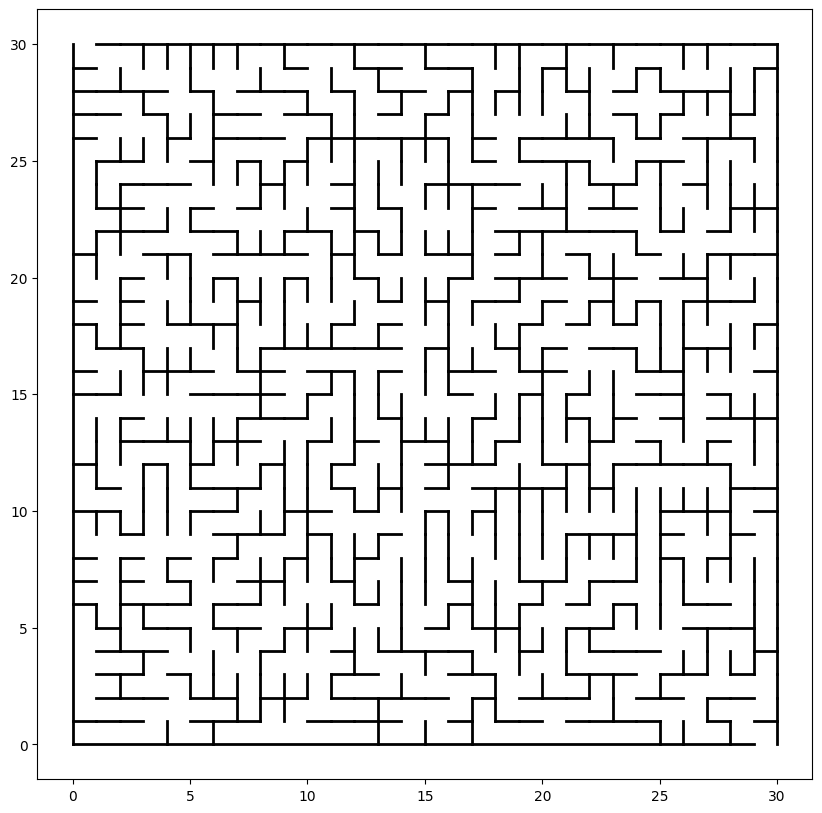

In [ ]:
CELL_SIZE = 1
N = 30
SEED = 0

random.seed(SEED)
maze = generate_maze(N)

fig = plt.figure(figsize=(10, 10))
draw_maze(maze, CELL_SIZE)
plt.show()